# Definição do Problema

A empresa Zuza Inc coletou dados do ano anterior com diversos atributos de funionários de todos os setores. O objetivo é estudar a relação desses
atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para
prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

* Pergunta 1 - Qual a Correlação entre os atributos dos Funcionários?
* Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
* Pergunta 3 - Qual Avaliação do Ano Anterior foi mais Comum?
* Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
* Pergunta 5 - Qual o Número de Treinamento mais Frequente?
* Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
* Pergunta 7 - Qual a Relação entre a Promoção e a Avaliação do Ano Anterior?

Seu trabalho é limpar e preparar os dados e então construir um dashboard no PowerBi para apresentar seus resultados.
    
    

## Carregando o Instalando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print("Versão da Linguagem Python: ", python_version())

Versão da Linguagem Python:  3.8.5


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute:
# !pip install nome_pacote==versão_desejada

# Depois de instalar/atualizar o pacote, reinicie o jupyter notebook.

# Instale o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

ModuleNotFoundError: No module named 'watermark'

## Carregando os dados

In [5]:
dadosRH = pd.read_csv('dadosRH.csv')

In [6]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [7]:
dadosRH.shape

(54808, 11)

## Análise Exploratória, Limpeza e Transformação de Dados
* Manipulando os dados e corrigindo eventuais problemas

In [8]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [9]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\elian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

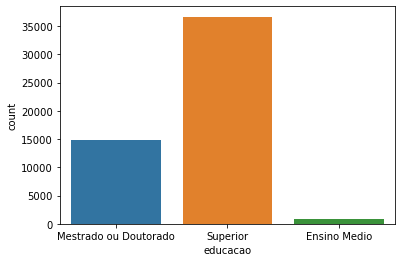

In [10]:
sns.countplot(dadosRH['educacao'])

In [11]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\elian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

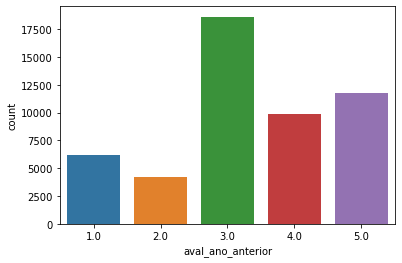

In [12]:
sns.countplot(dadosRH['aval_ano_anterior'])

### Vamos aplicar imputação e preencher os valores ausentes

In [14]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0],inplace = True)

In [15]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(),inplace=True)

In [16]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [17]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [18]:
    dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


### Verificando o balancemento de classe na variável "promovido"

In [19]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\elian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

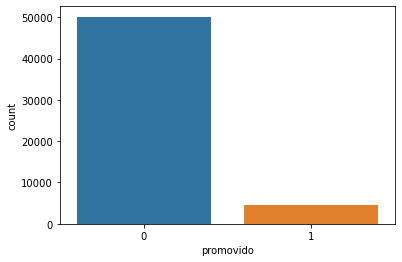

In [20]:
sns.countplot(dadosRH['promovido'])

In [21]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [22]:
df_classe_majoritaria.shape

(50140, 11)

In [23]:
df_classe_minoritaria.shape

(4668, 11)

In [25]:
# UPSAMPLE da classe minoritária
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria,
                                          replace = True,
                                          n_samples = 50140,
                                          random_state = 150)

In [26]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [27]:
dadosRH_balanceados.promovido.value_counts()

1    50140
0    50140
Name: promovido, dtype: int64

In [28]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 11.7+ MB


C:\Users\elian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

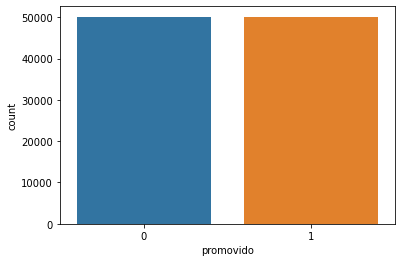

In [29]:
sns.countplot(dadosRH_balanceados['promovido'])

### Os dados já estão balanceados. Agora, salvando o dataset com os dados manipulados

In [30]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding='utf-8', index=False)
# index = False porque não quero carregar o índice

#### Carregamos os dados e seguimos com o trabalho de análise;

`---> A partir daqui executar também no Power BI`

In [31]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [32]:
# Veja que agora temos 100.280 registros porque balanceamos as classes
dataset.shape

(100280, 11)

### Pergunta 1 - Qual a correlação entre os Atributos dos Funcionários?

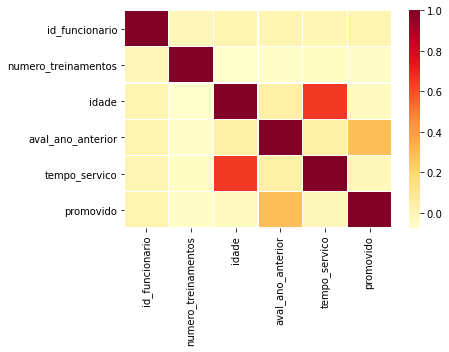

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

### Pergunta 2 - Qual o tempo de Serviço da MAIORIA dos Funcionários?

C:\Users\elian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


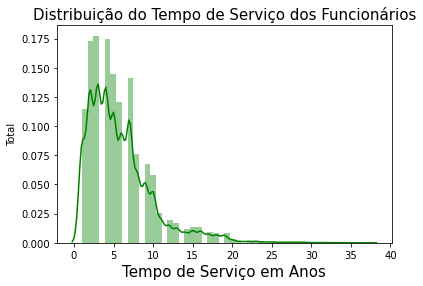

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 3 - Qual Avaliação do Ano Anterior foi mais COMUM?

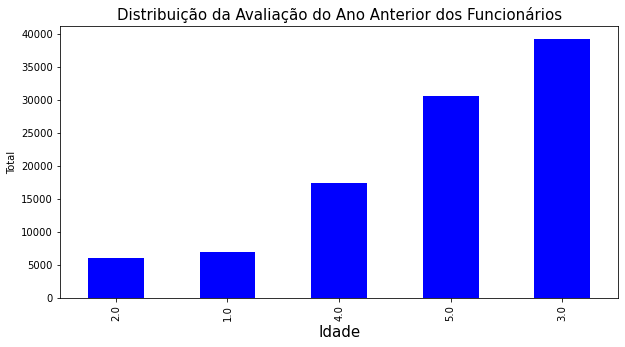

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color='blue',figsize = (10,5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Total')
plt.show()

### Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

C:\Users\elian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


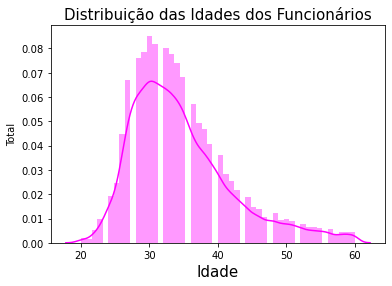

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color='magenta')
plt.title('Distribuição das Idades dos Funcionários', fontsize=15)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Total')
plt.show()

### Pergunta 5 - Qual o número de treinamento mais Frequente?

C:\Users\elian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


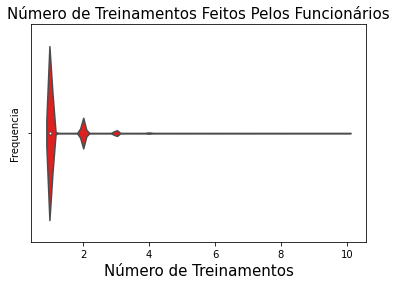

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color='red')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize=15)
plt.xlabel('Número de Treinamentos', fontsize=15)
plt.ylabel('Frequencia')
plt.show()

### Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

In [42]:
dataset['canal_recrutamento'].value_counts()
#deste comando saiu a lista "fatias"

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

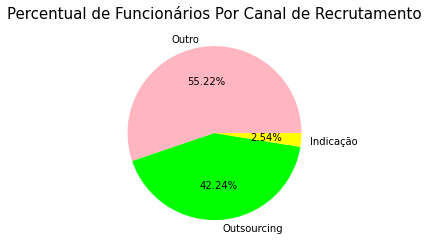

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['lightpink', 'lime', 'yellow']
explode = [0,0,0]
plt.pie(fatias, labels = labels, colors=colors, explode = explode, shadow = False, autopct = "%.2f%%")
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize=15)
plt.axis('off')
#plt.legend()
plt.show()

### Pergunta 7 - Qual a Relação entre a Promoção e a Avaliação do Ano Anterior?

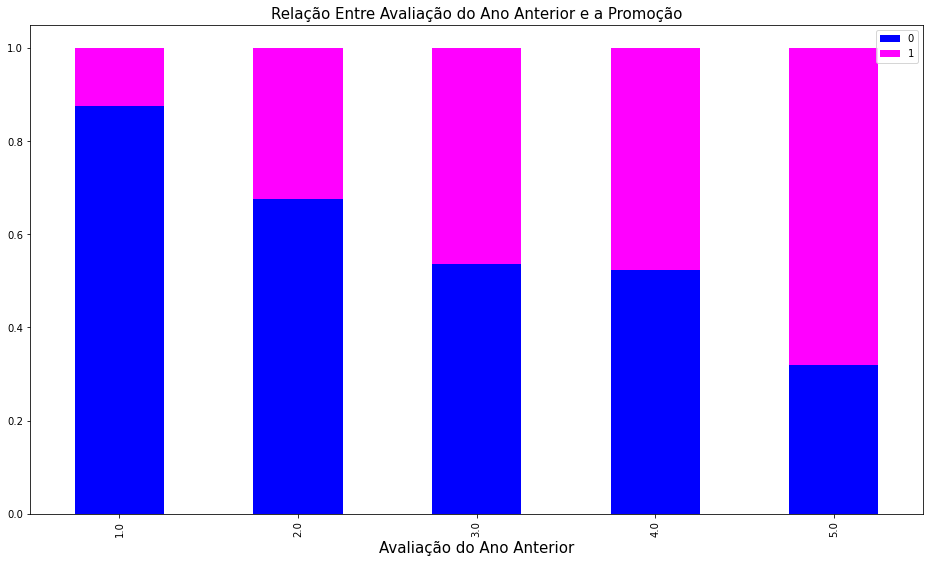

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis=0).plot(kind = 'bar',
                                                stacked = True,
                                                figsize = (16,9),
                                                color = ['blue', 'magenta'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize=15)
plt.xlabel('Avaliação do Ano Anterior', fontsize=15)
plt.legend()
plt.show()

In [55]:
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
print(data)

promovido              0      1
aval_ano_anterior              
1.0                 6135    878
2.0                 4044   1937
3.0                21048  18223
4.0                 9093   8264
5.0                 9820  20838
